* 또 다른 일반적인 보간 방법에 다항식or스플라인을 사용하여 값을 연결하는 방
법이 있다.
* 이렇게 하면 linear와 비교했을 때 더 많은 곡선이 생기므로 dataset을 더 자연
스럽게 보간할 수 있다.
* 스플라인 보간을 사용하려면 다항식의 차수를 지정해야한다. (parameter 중 order가 이에 해당한다.)
* 스플라인 보간이란 곡선을 토대로 점을 잇는 보간법이다.

In [51]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
import pandas as pd
import datetime

def parser(x):
    return pd.datetime.strptime('190'+ x, '%Y-%m')
series = pd.read_csv('shampoo.csv', header= 0, index_col= 0, parse_dates= True,
squeeze= True , date_parser= parser)
upsampled = series.resample('D').mean()
print(upsampled. head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


<ipython-input-51-fd3f45f1e00b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-51-fd3f45f1e00b>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+ x, '%Y-%m')


Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
                 ...    
1903-11-27    638.153333
1903-11-28    640.340000
1903-11-29    642.526667
1903-11-30    644.713333
1903-12-01    646.900000
Freq: D, Name: Sales, Length: 1065, dtype: float64


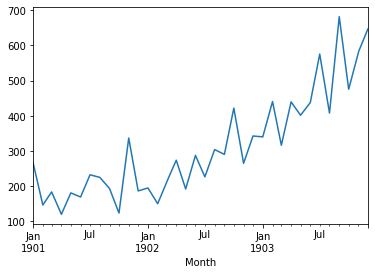

In [52]:
interpolated = upsampled.interpolate(metheod='time')
print(interpolated)
interpolated.plot()
plt.show()

Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
Freq: D, Name: Sales, dtype: float64


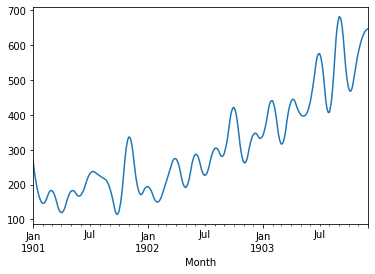

In [55]:
upsampled = series. resample('D'). mean()
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated. head())
interpolated. plot()
plt.show()

## Downsampling Data

* 월별로 분리된 dataset이지만 분기 별 data를 선호할 수도 있다.
* resample()함수에서 parameter로 'Q'를 입력해주면 분기별로 분류할 수 있다.
* 3분기(4개월씩)로 나누어지며 이를 mean()함수를 통해 분기별 평균을 계산한
다

In [ ]:
series.head(5)

In [ ]:
resample = series.resample('Q').mean()
resample

In [ ]:
resample.plot()
plt.show()

## Chapter 8. Power Transforms
Chapter 8에서는
* 제곱근 변환의 사용 시기 및 탐색 방법을 식별하는 방법
* 로그 변환의 사용 시기 그리고 원시데이터의 기대값 탐색 방법
* Box-Cox 변환을 사용하여 제곱근, 로그 작업을 수행하고 dataset에 가장 적합
한 변환을 자동으로 찾는 방법


## Airline Passengers Dataset
* Airline Passengers dataset은 시간 경과에 따른 총 항공사 승객 수에 대한 Time
Series이다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('airline-passengers.csv', header = 0, index_col = 0,
                    parse_dates= True, squeeze= True)

plt.plot(series)
plt.show()
plt.hist(series)
plt.show()

## Square Root Transform

* 2차곡선 형태를 가지는 time series를 제곱근을 취해 선형으로 만들어본다.

In [ ]:
series = [i**2 for i in range(1,101)]

plt.subplot(211)
plt.plot(series)

plt.subplot(212)
plt.hist(series)
plt.show()

In [ ]:
from numpy import sqrt
transform = sqrt(series)

plt.subplot(211)
plt.plot(transform)

plt.subplot(212)
plt.hist(transform)

plt.show()

In [ ]:
series = pd.read_csv('airline-passengers.csv', header = 0, index_col = 0,
                    parse_dates= True, squeeze= True)
print(series)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

plt.subplot(211)
plt.plot(dataframe)

plt.subplot(212)
plt.hist(dataframe)

In [ ]:
import numpy as np

dataframe['passengers'] = np.log(dataframe['passengers'])

plt.subplot(211)
plt.plot(dataframe)

plt.subplot(212)
plt.hist(dataframe)

## Box-Cox Transform
* 제곱근 변환 및 로그 변환은 power transforms이라고 불리는 transforms class
에 속한다.
* boxcox()에서 lambda에 따라 어떤 transform을 사용할 지 결정한다.
* 여러 변환을 수행할 수 있어 time series의 transform을 위한 강력한 도구로 사
용할 수 있다.



In [ ]:
from scipy.stats import boxcox

series = pd.read_csv('airline-passengers.csv', header = 0, index_col = 0,
                    parse_dates= True, squeeze= True)
print(series)
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda = 0.0) # 람다 0이므로 로그변환

# 람다에 따라 다항변환, 로그변환, 여러가지가 됨

## Chapter 9. Moving Average Smoothing

* Moving Average Smoothing의 원리와 data에 대한 기대치
* data 작성 및 feature enginerring을 위한 Moving Average Smoothing 사용방법
* Moving Average Smoothing을 이용하여 예측하는 방법에 대해 배운다.

## Moving Average Smoothing

* Moving Average을 계산하려면 값이 원래 시계열의 원시 관측 값 평균으로 구성된 새 시리즈를 생성해야한다.
* Moving Average을 사용하려면 창 너비라는 창 크기를 지정해야한다.
* Moving Average의 목표는 노이즈를 제거하고 근본적인 인과 과정의 신호를 더잘 노출 시키는 것이다.
* 이 기법을 적절하게 적용하면 근본적인 추세, 계절 및 주기적 구성 요소를보다명확하게 보여준다.

* 그냥 lag window 값들의 평균으로 생각한다.

## centered moving average, trailing moving average

센터는 t-1, t t+1, 트레일링은 t-2, t-1, t

주로 트레일링이 쓰임

In [75]:
series = read_csv('daily-total-female-births.csv', header=0, index_col=0,
                 parse_dates= True, squeeze = True)
df =pd.DataFrame(series.values)
width =3
lag1 = df.shift(1)
lag3 = df.shift(2)
means = lag3.rolling(window=width).mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe)

          mean     t  t+1
0          NaN   NaN   35
1          NaN  35.0   32
2          NaN  32.0   30
3          NaN  30.0   31
4    32.333333  31.0   44
..         ...   ...  ...
360  40.666667  34.0   37
361  38.666667  37.0   52
362  38.333333  52.0   48
363  41.000000  48.0   55
364  45.666667  55.0   50

[365 rows x 3 columns]


predicted = 32.333333, expected = 31.000000
predicted = 31.000000, expected = 44.000000
predicted = 35.000000, expected = 29.000000
predicted = 34.666667, expected = 45.000000
predicted = 39.333333, expected = 43.000000
predicted = 39.000000, expected = 38.000000
predicted = 42.000000, expected = 27.000000
predicted = 36.000000, expected = 38.000000
predicted = 34.333333, expected = 33.000000
predicted = 32.666667, expected = 55.000000
predicted = 42.000000, expected = 47.000000
predicted = 45.000000, expected = 45.000000
predicted = 49.000000, expected = 37.000000
predicted = 43.000000, expected = 50.000000
predicted = 44.000000, expected = 43.000000
predicted = 43.333333, expected = 41.000000
predicted = 44.666667, expected = 52.000000
predicted = 45.333333, expected = 34.000000
predicted = 42.333333, expected = 53.000000
predicted = 46.333333, expected = 39.000000
predicted = 42.000000, expected = 32.000000
predicted = 41.333333, expected = 37.000000
predicted = 36.000000, expected 

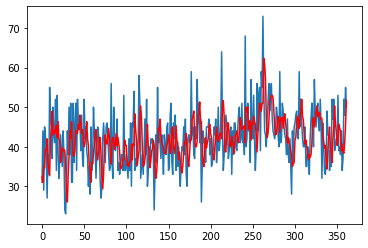

In [112]:
from sklearn.metrics import mean_squared_error

X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions =list()
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted = %f, expected = %f' % (yhat,obs))

rmse = sqrt(mean_squared_error(test,predictions)) 
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Ch:10. A Gentle Introduction to WhiteNoise

* white noise time series의 정의와 그것의 중요한 이유
* time series가 white noise인지 확인하는 방법
* python에서 white noise를 식별하기위한 통계 및 진단 plot에 대해 배운다.

## What is a White Noise?
* Time series는 변수가 독립적이고 평균이 0으로 동일하게 분포된 경우 whitenoise이다.
* 모든 변수는 동일한 분산을 가지며 각 값은 다른 모든 값과 0의 상관관계를 가지면 white noise
* 변수가 가우스 분포에서 추출된 경우는 gaussian white noise라고 한다.
* 시계열 데이터를 분석하고 추출하고 남은 이상치들은 white noise 여야 한다.
* time serise data = y(t) = signal(t) + white_noise(t)

1. 평균이 0이고 일정해야
2. 분산이 1이고 일정해야
3. 자기 상관계수(autocorrelation)가 0이여야

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


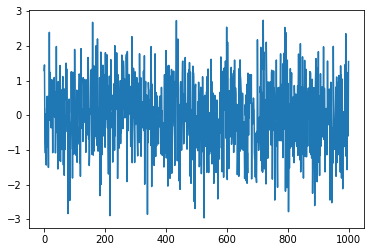

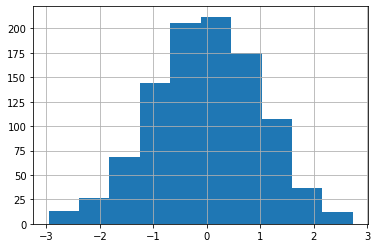

C:\Users\jh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


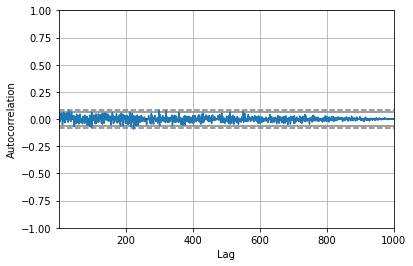

In [117]:
from random import gauss
from pandas import Series
from random import seed
from pandas.plotting import autocorrelation_plot

seed(1)

series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
print(series.describe())

series.plot()
plt.show()

series.hist()
plt.show()

autocorrelation_plot(series)
# 자기상관계수가 0 근처에서 보이는것을 알수 있다. 데이터 간의 관계가 없는것이다.
plt.show()